<a href="https://colab.research.google.com/github/afraz-rupak/Building-Your-First-ANN-with-TensorFlow/blob/main/Neural_Networks_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [131]:
X_train = np.loadtxt('/content/train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('/content/train_label.csv', delimiter = ',').T

X_test = np.loadtxt('/content/test_X.csv',delimiter=',').T
Y_test = np.loadtxt('/content/test_label.csv',delimiter=',').T

In [132]:
print('shape of x_train: ',X_train.shape)
print('shape of y_train: ',Y_train.shape)

print('shape of x_test: ',X_test.shape)
print('shape of y_test: ',Y_test.shape)

shape of x_train:  (784, 1000)
shape of y_train:  (10, 1000)
shape of x_test:  (784, 350)
shape of y_test:  (10, 350)


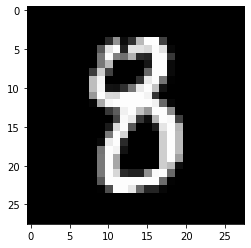

In [133]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28), cmap='gray')
plt.show()

#Model

In [134]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(x,0)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX, axis = 0)

In [135]:
def derivative_tanh(x):
       return 1 -  np.power(x, 2) #correction

def derivative_relu(x):
  return np.array(x > 0, dtype = np.float32)



#Initialize Parameters

In [136]:
def initialize_parameters(n_x, n_h,n_y):
  w1 = np.random.randn(n_h , n_x) *0.01
  b1 = np.zeros((n_h , 1))

  w2 = np.random.randn(n_y , n_h) *0.01
  b2 = np.zeros((n_y , 1))

  parameters = {
      "w1" : w1,
      "b1" : b1,
      "w2" : w2,
      "b2" : b2,
  }
  return parameters

#Forward propagation

In [137]:
def forward_propagation(x, parameters):

  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1 , x) + b1
  a1 = tanh(z1)

  z2 = np.dot(w2 , a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      "z1" : z1,
      "a1" : a1,
      "z2" : z2,
      "a2" : a2
  }
  return forward_cache

#cost function

In [138]:
def cost_function(a2, y):
  m = y.shape[1]

  cost = -(1/m)*np.sum(y*np.log(a2))
  #cost = -(1/m)*np.sum(y*np.log(a2, 0),1)
  return cost

#Backpropagation

In [139]:
def backward_prop(x, y, parameters, forward_cache):

  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2'] 
    

  a1 = forward_cache['a1']
  a2 = forward_cache['a2']

  m = x.shape[1]

  dz2 = (a2 - y)
  dw2 = (1/m)*np.dot(dz2, a1.T)
  db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

  dz1 = (1/m)*np.dot(w2.T , dz2)*derivative_tanh(a1)
  dw1 = (1/m)*np.dot(dz1, x.T)
  db1 = (1/m)*np.sum(dz1, axis = 1, keepdims= True)

  gradients = {
      "dw1" : dw1,
      "db1" : db1,
      "dw2" : dw2,
      "db2" : db2,
  }

  return gradients

#update_parameters

In [140]:
def update_parameters(parameters, gradients, learning_rate):
    
    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    # Fetching our gradients
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    ## Complete the Code below ##
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    
    # Returning the updated parameters
    parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

#Complete Model

In [141]:
#from numpy.lib.function_base import gradient
def model(x, y, n_h, learning_rate, iterations):
    
    
    n_x =  x.shape[0]                      # must return the number of neurons/features in input layer
    n_y =  y.shape[0]                     # must return the number of neurons in output layer
    
    
    cost_list = []
    
   
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    
    for i in range(iterations):
        
        # Forward Propagation
        forward_cache = forward_propagation(x, parameters)
        # Cost Function
        cost = cost_function(forward_cache['a2'], y)
        
        # Backward propagation
        gradients = backward_prop(x, y, parameters,  forward_cache)
        # Update Parameters
        parameters = update_parameters(parameters,gradients,learning_rate)
        cost_list.append(cost)
        
        if (i%(iterations/10) == 0) :
            print("cost after", i, "iters is" , cost)
            
            
    
    return parameters, cost_list

In [142]:
## Complete the Code Below ##

n_h = 1000
learning_rate = 0.02
iterations = 500

## Model Code ends ##

Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

cost after 0 iters is 2.3256318968785186
cost after 50 iters is 0.49182339084189836
cost after 100 iters is 0.31349543093058396
cost after 150 iters is 0.22995333077847646
cost after 200 iters is 0.17873917696179842
cost after 250 iters is 0.14389294781641165
cost after 300 iters is 0.11887212833236589
cost after 350 iters is 0.10029578722796889
cost after 400 iters is 0.08615430894996984
cost after 450 iters is 0.07514820675908081


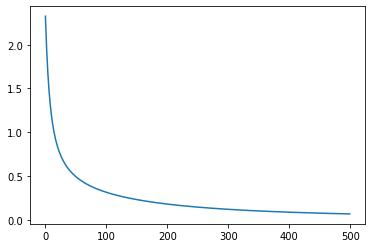

In [143]:
t = np.arange(0 , iterations)
plt.plot(t,Cost_list)
plt.show()

In [144]:
def accuracy(inp,labels,parameters):
  forward_cache = forward_propagation(inp, Parameters)
  a_out = forward_cache['a2']
  a_out = np.argmax(a_out, 0)

  y_out = np.argmax(labels, 0)
  a_out == y_out

  acc = np.mean(a_out == y_out)*100
  return acc

In [145]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 100.0 %
Accuracy of Test Dataset 88.0 %


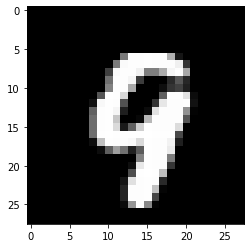

Our model says, it is :  9


In [146]:
idx = random.randrange(0, X_test.shape[1])
plt.imshow(X_test[:,idx].reshape(28,28), cmap='gray')
plt.show()

forward_cache = forward_propagation(X_test[:, idx].reshape(X_test.shape[0], 1), Parameters)
a_out = forward_cache['a2']
a_out = np.argmax(a_out, 0)

print('Our model says, it is : ',a_out[0])

